In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import streamlit as st

In [75]:
!pwd

/Users/emilyguo/Desktop/CMU/IDS/FinalProject


In [76]:
df = pd.read_csv("./Data/data_by_year.csv")

In [77]:
df.head()

,year,danceability,energy,valence,tempo,loudness,mode,key,acousticness,instrumentalness,liveness,speechiness,duration_ms,popularity
0,1921,0.425661,0.236784,0.425495,100.397758,-17.095437,1,7,0.895823,0.322330,0.215814,0.077258,229911.9141,0.351562
1,1922,0.480000,0.237026,0.534056,101.376139,-19.179958,1,10,0.939236,0.440470,0.238647,0.115419,167904.5417,0.138889
2,1923,0.568462,0.246936,0.624788,112.456598,-14.373882,1,0,0.976329,0.401932,0.236656,0.098619,178356.3018,5.727811
3,1924,0.548654,0.347033,0.668574,120.653359,-14.202304,1,10,0.935575,0.583955,0.237875,0.090210,188461.6498,0.603376
4,1925,0.571890,0.264373,0.616430,115.671715,-14.516707,1,5,0.965422,0.408893,0.243094,0.115457,184130.6996,2.707224


In [78]:
df.describe()

,year,danceability,energy,valence,tempo,loudness,mode,key,acousticness,instrumentalness,liveness,speechiness,duration_ms,popularity
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,1970.500000,0.537485,0.455864,0.536384,116.026461,-11.916648,1.0,4.190000,0.552625,0.192160,0.209335,0.101247,226930.361384,27.223173
std,29.011492,0.052033,0.164619,0.058394,5.754132,3.131902,0.0,3.586436,0.282113,0.129622,0.018237,0.066003,25270.584546,21.003768
min,1921.000000,0.403515,0.204252,0.373623,100.397758,-19.179958,1.0,0.000000,0.228712,0.035948,0.167161,0.051050,167904.541700,0.138889
25%,1945.750000,0.500161,0.286154,0.495800,111.802986,-14.309401,1.0,0.000000,0.282738,0.098798,0.198728,0.065124,208882.913175,2.939625
50%,1970.500000,0.544746,0.498728,0.548000,117.597018,-11.761678,1.0,5.000000,0.452951,0.124916,0.207946,0.086237,234673.799950,33.655500
75%,1995.250000,0.571744,0.600955,0.574516,120.819829,-9.715596,1.0,7.000000,0.867022,0.277763,0.220389,0.104962,248234.122450,44.411125
max,2020.000000,0.673077,0.693696,0.668574,123.656818,-6.694271,1.0,10.000000,0.976329,0.583955,0.264347,0.485278,266387.733000,69.655500


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   year              100 non-null    int64  
 1   danceability      100 non-null    float64
 2   energy            100 non-null    float64
 3   valence           100 non-null    float64
 4   tempo             100 non-null    float64
 5   loudness          100 non-null    float64
 6   mode              100 non-null    int64  
 7   key               100 non-null    int64  
 8   acousticness      100 non-null    float64
 9   instrumentalness  100 non-null    float64
 10  liveness          100 non-null    float64
 11  speechiness       100 non-null    float64
 12  duration_ms       100 non-null    float64
 13  popularity        100 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 11.1 KB


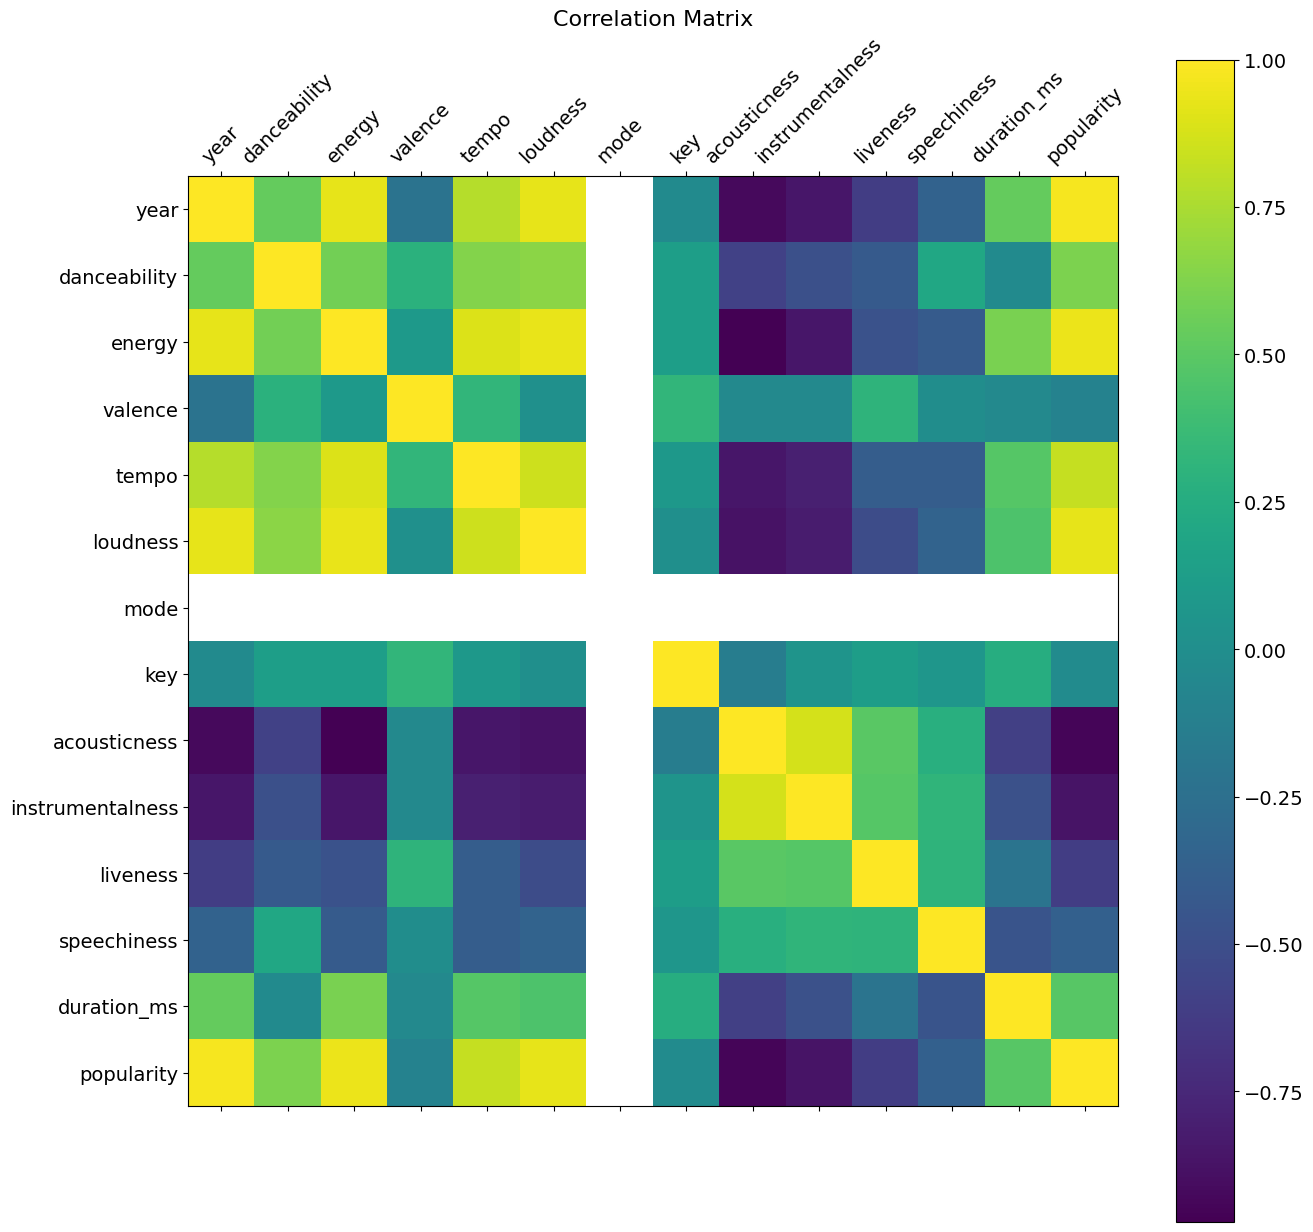

In [80]:
f = plt.figure(figsize=(15, 15))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

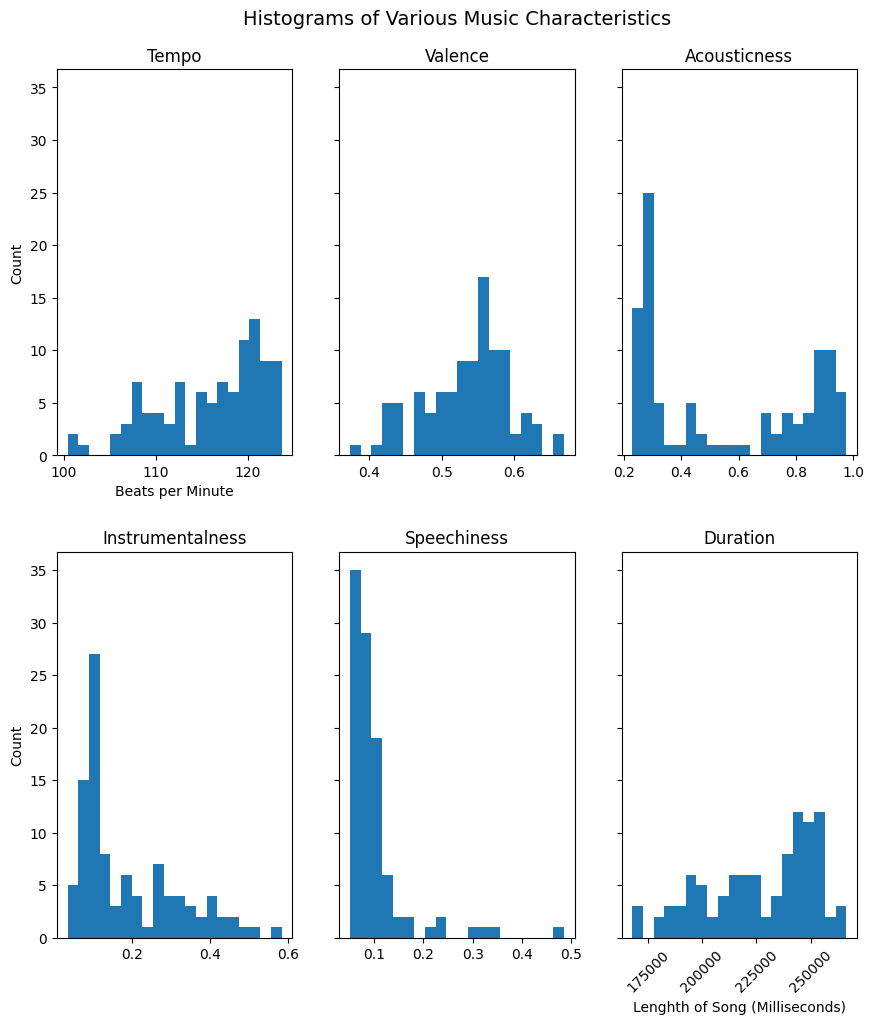

In [81]:
fig, axs = plt.subplots(nrows = 2, ncols = 3, sharey=True, tight_layout=True, figsize=(10, 10))
fig.tight_layout(pad=2)
plt.subplots_adjust(left=0.1, 
                    right=0.9, 
                    top=0.92, 
                    wspace=0.2, 
                    hspace=0.25)
fig.suptitle("Histograms of Various Music Characteristics", fontsize=14)

n_bins = 20
axs[0][0].hist(df['tempo'], bins=n_bins)
axs[0][0].set_title('Tempo')
axs[0][0].set_ylabel('Count')
axs[0][0].set_xlabel('Beats per Minute')

axs[0][1].hist(df['valence'], bins=n_bins)
axs[0][1].set_title('Valence')

axs[0][2].hist(df['acousticness'], bins=n_bins)
axs[0][2].set_title('Acousticness')

axs[1][0].hist(df['instrumentalness'], bins=n_bins)
axs[1][0].set_title('Instrumentalness')
axs[1][0].set_ylabel('Count')

axs[1][1].hist(df['speechiness'], bins=n_bins)
axs[1][1].set_title('Speechiness')

axs[1][2].hist(df['duration_ms'], bins=n_bins)
axs[1][2].set_title('Duration')
axs[1][2].set_xlabel('Lenghth of Song (Milliseconds)')
axs[1][2].tick_params(labelrotation=45)

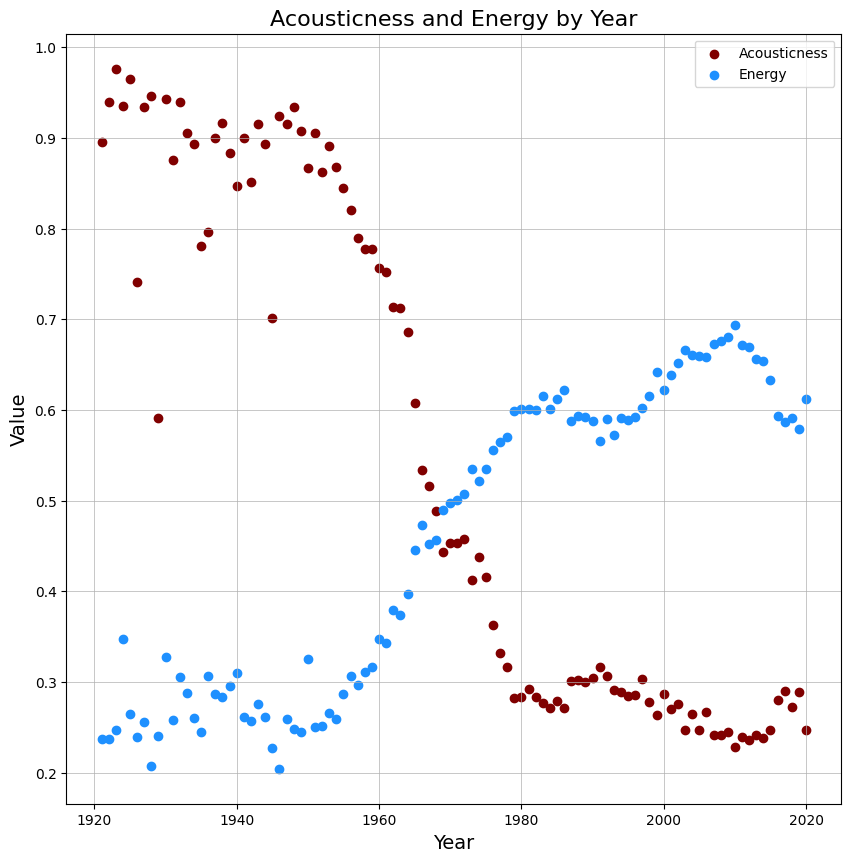

In [101]:
fig = plt.figure(figsize=(10, 10))

plt.grid(linestyle='-', linewidth=0.5)
plt.scatter(df['year'], df['acousticness'], color='maroon', label='Acousticness')
plt.scatter(df['year'], df['energy'], color='dodgerblue', label='Energy')
plt.title("Acousticness and Energy by Year", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Value", fontsize=14)
plt.legend()
plt.show()